# NLP Task

<p>The Task is: <br></br>
<a href= "https://competitions.codalab.org/competitions/19955#learn_the_details-data-specifications">SemEval 2019 Task 9 - SubTask A - Suggestion Mining from Online Reviews and Forums</a>
</p>

# Exploratory Data Analysis


In [1]:
import nltk

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import os, gc, time, warnings
%matplotlib inline

In [4]:
train= pd.read_csv("V1.4_Training.csv",encoding = "latin-1")
dev= pd.read_csv("SubtaskA_Trial_Test_Labeled.csv",encoding = "latin-1")
test = pd.read_csv("SubtaskA_EvaluationData.csv", encoding = 'latin-1')

In [5]:
train.head()

,id,sentence,label
0,663_3,"""Please enable removing language code from the...",1
1,663_4,"""Note: in your .csproj file, there is a Suppor...",0
2,664_1,"""Wich means the new version not fully replaced...",0
3,664_2,"""Some of my users will still receive the old x...",0
4,664_3,"""The store randomly gives the old xap or the n...",0


In [6]:
train.head()

,id,sentence,label
0,663_3,"""Please enable removing language code from the...",1
1,663_4,"""Note: in your .csproj file, there is a Suppor...",0
2,664_1,"""Wich means the new version not fully replaced...",0
3,664_2,"""Some of my users will still receive the old x...",0
4,664_3,"""The store randomly gives the old xap or the n...",0


In [7]:
train.tail()

,id,sentence,label
8495,2839,The following will reliably throw some flavor ...,0
8496,2840,This will reliably result in a BSOD if zero by...,0
8497,2842,As of now it's only possible to set the Calend...,0
8498,2843,It's not possible to set the Hijri adjustment ...,0
8499,2844,The Windows 10 Calender app show cases this fe...,0


In [8]:
dev.head()

,id,sentence,label
0,1310_1,I'm not asking Microsoft to Gives permission l...,1
1,1312_1,somewhere between Android and iPhone.,0
2,1313_1,And in the Windows Store you can flag the App ...,0
3,1313_2,"Many thanks Sameh Hi, As we know, there is a l...",0
4,1313_3,The idea is that we can develop a regular app ...,1


In [9]:
test.head()

,Id,sentence,label
0,9566,This would enable live traffic aware apps.,X
1,9569,Please try other formatting like bold italics ...,X
2,9576,Since computers were invented to save time I s...,X
3,9577,Allow rearranging if the user wants to change ...,X
4,9579,Add SIMD instructions for better use of ARM NE...,X


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
id          8500 non-null object
sentence    8500 non-null object
label       8500 non-null int64
dtypes: int64(1), object(2)
memory usage: 199.3+ KB


In [11]:
suggestion_count = (train['label'].values == 1).astype(int).sum()
non_suggestion_count = (train['label'].values == 0).astype(int).sum()
print("Total sentences : " + str(train.shape[0]))
print("Total suggestions : " + str(suggestion_count))
print("Total non_suggestions : " + str(non_suggestion_count))

Total sentences : 8500
Total suggestions : 2085
Total non_suggestions : 6415


In [12]:
suggestions = train[train['label'].values == 1]

while suggestion_count < non_suggestion_count:
    random_suggestion = suggestions.sample()
    train = train.append(random_suggestion, ignore_index = True)
    suggestion_count = suggestion_count + 1

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12830 entries, 0 to 12829
Data columns (total 3 columns):
id          12830 non-null object
sentence    12830 non-null object
label       12830 non-null int64
dtypes: int64(1), object(2)
memory usage: 300.8+ KB


In [13]:

dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 3 columns):
id          592 non-null object
sentence    592 non-null object
label       592 non-null int64
dtypes: int64(1), object(2)
memory usage: 14.0+ KB


In [14]:
# class-imbalance in development data

suggestion_count = (dev['label'].values == 1).astype(int).sum()
non_suggestion_count = (dev['label'].values == 0).astype(int).sum()
print("Total sentences : " + str(dev.shape[0]))
print("Total suggestions : " + str(suggestion_count))
print("Total non_suggestions : " + str(non_suggestion_count))

Total sentences : 592
Total suggestions : 296
Total non_suggestions : 296


In [15]:
train_data= train["sentence"]

In [16]:
train_target= train["label"]

In [17]:
print(train_target[4])
train_data[4]

0


'"The store randomly gives the old xap or the new xap version of my app."'

In [18]:
dev_data= dev["sentence"]
dev_target = dev["label"]

In [19]:
test_data_orig= test["sentence"]
test_data_orig[0]

'This would enable live traffic aware apps.'

# Tokenization

In [20]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
word_tokenize(train_data[4].lower())
word_tokenize(dev_data[4].lower())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyanshuaggarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the',
 'idea',
 'is',
 'that',
 'we',
 'can',
 'develop',
 'a',
 'regular',
 'app',
 'and',
 'we',
 'request',
 'our',
 'permissions',
 'in',
 'the',
 'manifest',
 ',',
 'or',
 'the',
 'app',
 'can',
 'ask',
 'for',
 'trust_æ_',
 'more']

In [21]:
train_documents = []
for i in range(len(train_data)):
    train_documents.append((word_tokenize(train_data[i].lower()) ,train_target[i]))
train_documents[8]    

(['``',
  'it',
  'should',
  'be',
  'an',
  'option',
  'to',
  'remove',
  'the',
  '``',
  'ru',
  "''",
  'language',
  'code',
  'from',
  'my',
  'app',
  "'language",
  'history',
  "'",
  'or',
  'an',
  'option',
  'to',
  'completly',
  'replace',
  ':',
  'fully',
  'replace',
  'the',
  'prevoius',
  '(',
  'es',
  ')',
  'xap',
  '(',
  's',
  ')',
  '.',
  "''"],
 1)

In [22]:
dev_documents = []
for i in range(len(dev_data)):
    dev_documents.append((word_tokenize(dev_data[i].lower()),train_target[i]))
dev_documents[0] 

(['i',
  "'m",
  'not',
  'asking',
  'microsoft',
  'to',
  'gives',
  'permission',
  'like',
  'android',
  'so',
  'any',
  'app',
  'can',
  'take',
  'my',
  'data',
  ',',
  'but',
  'do',
  "n't",
  'keep',
  'it',
  'restricted',
  'like',
  'iphone',
  '.'],
 1)

In [23]:
test_documents = []
for i in range(len(test_data_orig)):
    test_documents.append((word_tokenize(test_data_orig[i].lower())))
test_documents[0] 

['this', 'would', 'enable', 'live', 'traffic', 'aware', 'apps', '.']

In [24]:
train_documents[70]

(['``',
  'appointments',
  'have',
  'a',
  'remoteid',
  'but',
  'calendars',
  'do',
  "n't",
  '.',
  "''"],
 0)

# Stemming and Lemmatization

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [27]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
w = "better"
pos_tag([w])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/divyanshuaggarwal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('better', 'RBR')]

In [28]:
from nltk.corpus import stopwords
import string
nltk.download('wordnet')
nltk.download('stopwords')
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyanshuaggarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyanshuaggarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


# Review Cleaning

In [29]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [30]:
train_documents = [(clean_review(document), category) for document, category in train_documents]
dev_documents = [(clean_review(document), category) for document, category in dev_documents]

In [31]:
train_documents[0]

(['``',
  'please',
  'enable',
  'remove',
  'language',
  'code',
  'dev',
  'center',
  '``',
  'language',
  'history',
  "''",
  'example',
  'ever',
  'select',
  '``',
  'ru',
  "''",
  '``',
  'ru-ru',
  "''",
  'laguages',
  'publish',
  'xap',
  'store',
  'cause',
  'tile',
  'localization',
  'show',
  'en-us',
  'default',
  'tile',
  'localization',
  'bad',
  "''"],
 1)

In [32]:
dev_documents[0]

(["'m",
  'ask',
  'microsoft',
  'give',
  'permission',
  'like',
  'android',
  'app',
  'take',
  'data',
  "n't",
  'keep',
  'restrict',
  'like',
  'iphone'],
 1)

In [33]:
len(train_documents)

12830

In [34]:
len(dev_documents)

592

In [35]:
len(test_documents)

833

In [36]:
training_documents_orig = train_documents
testing_documents_orig= test_documents
dev_documents_orig= dev_documents


In [37]:
train_documents[0][0]

['``',
 'please',
 'enable',
 'remove',
 'language',
 'code',
 'dev',
 'center',
 '``',
 'language',
 'history',
 "''",
 'example',
 'ever',
 'select',
 '``',
 'ru',
 "''",
 '``',
 'ru-ru',
 "''",
 'laguages',
 'publish',
 'xap',
 'store',
 'cause',
 'tile',
 'localization',
 'show',
 'en-us',
 'default',
 'tile',
 'localization',
 'bad',
 "''"]

In [38]:
all_words_train = []
for doc in train_documents:
    all_words_train += doc[0]

In [39]:
len(all_words_train)

159996

In [40]:
all_words_dev = []
for doc in dev_documents:
    all_words_dev += doc[0]

In [41]:
len(all_words_dev)

6171

In [42]:
all_words_orig_train = []
for doc in training_documents_orig:
    all_words_orig_train += doc[0]

In [43]:
all_words_orig_dev = []
for doc in dev_documents_orig:
    all_words_orig_dev += doc[0]

In [44]:
all_words = all_words_train + all_words_dev
len(all_words)

166167

In [45]:
len(all_words)

166167

In [46]:
all_words = all_words_train + all_words_dev
import nltk
freq = nltk.FreqDist(all_words)

common = freq.most_common(3000)
features = [i[0] for i in common]

In [47]:
freq

FreqDist({"''": 12486, '``': 11396, 'app': 2220, 'would': 2172, 'window': 1589, 'use': 1512, 'like': 1442, 'add': 1228, 'please': 1152, 'user': 1149, ...})

In [48]:
del freq["''"]
del freq['``']

# Visualisation of Some Frequently Occuring Words

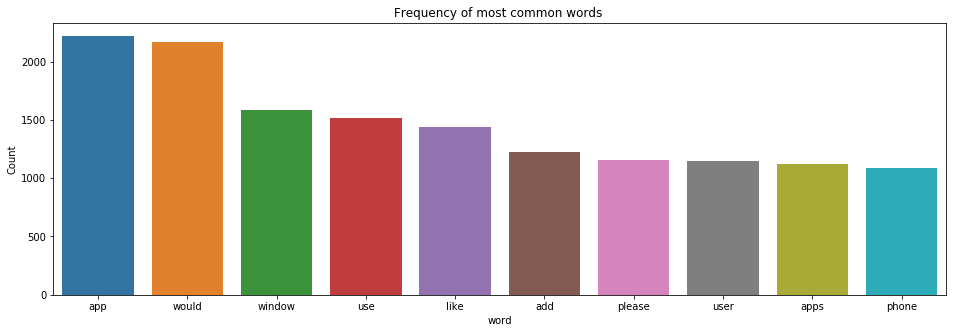

In [49]:
d = pd.DataFrame({'word': list(freq.keys()),
                  'Count': list(freq.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "word", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Frequency of most common words ")
plt.show()

In [50]:
all_words_orig = all_words_orig_train + all_words_orig_dev
import nltk
freq = nltk.FreqDist(all_words_orig)
common = freq.most_common(3000)
features_orig = [i[0] for i in common]

In [51]:

bow = {}

for j in training_documents_orig:
    if j[1] == 0:
        for i in j[0]: 
            if i in bow.keys():
                bow[i] += 1
            else:
                bow[i] = 1
           


In [52]:
len(bow)

8058

In [53]:
del bow["''"]
del bow['``']
del bow["n't"]
del bow["'s"]

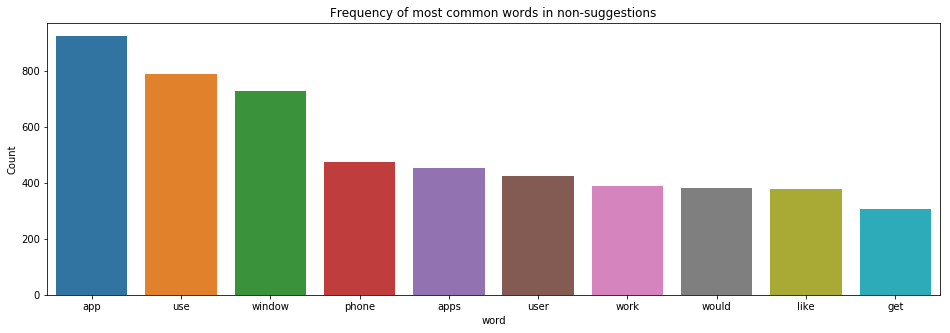

In [54]:
d = pd.DataFrame({'word': list(bow.keys()),
                  'Count': list(bow.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "word", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Frequency of most common words in non-suggestions")
plt.show()

In [55]:
bow = {}

for j in training_documents_orig:
    if j[1] == 1:
        for i in j[0]: 
            if i in bow.keys():
                bow[i] += 1
            else:
                bow[i] = 1

In [56]:
len(bow)

4026

In [57]:
del bow["''"]
del bow['``']
del bow["n't"]
del bow["'s"]

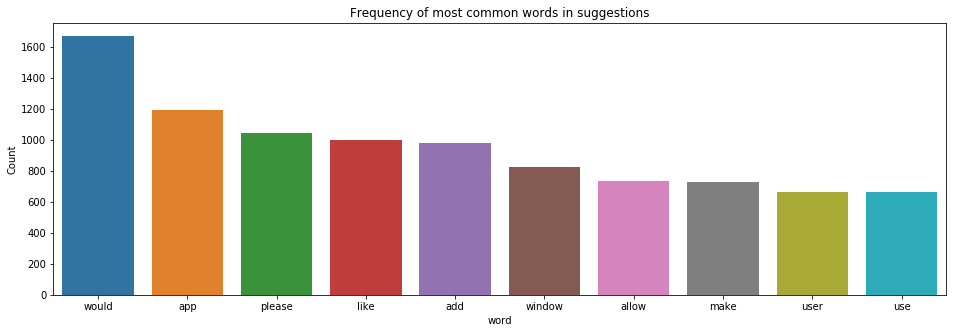

In [58]:
d = pd.DataFrame({'word': list(bow.keys()),
                  'Count': list(bow.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "word", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Frequency of most common words in suggestions")
plt.show()

<p>It is clear from the above 3 graphs that app,would,window are the most occuring words. <br>
    However words like would ,please ,add ,allow ,make ,could occur more frequently in suggestions as compared to non-sugestions.

</p>

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


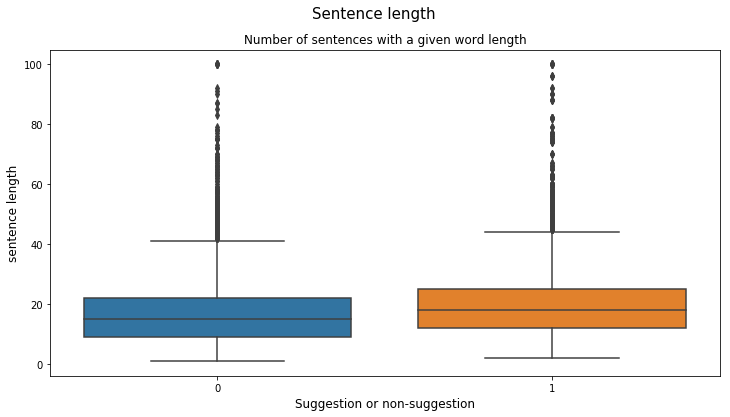

In [59]:
df = pd.concat([train, dev])
df['count_word'] = df['sentence'].apply(lambda x : len(x.split()))

plt.figure(figsize = (12, 6))
plt.suptitle("Sentence length", fontsize = 15)
count_word = df['count_word'].astype(int)
df['count_word'].loc[df['count_word'] > 100] = 100
plt.plot()
sns.boxplot(y = 'count_word', x = 'label', data = df)
plt.xlabel('Suggestion or non-suggestion', fontsize = 12)
plt.ylabel('sentence length', fontsize = 12)
plt.title("Number of sentences with a given word length", fontsize = 12)
plt.show()


<p>Here We can see that Suggestions on an average are slightly longer than non-suggestions</p>

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


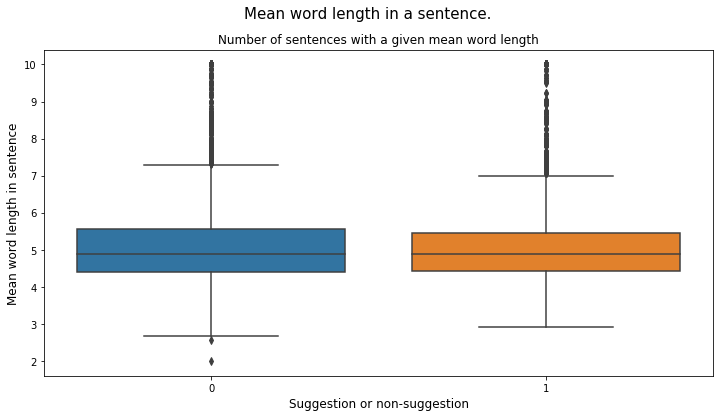

In [60]:
# plot of mean word length against label

df = pd.concat([train, dev])
df['mean_word_len'] = df['sentence'].apply(lambda x : np.mean([len(word) for word in x.split()]))

plt.figure(figsize = (12, 6))
plt.suptitle("Mean word length in a sentence.", fontsize = 15)
mean_word_len = df['mean_word_len'].astype(int)
df['mean_word_len'].loc[df['mean_word_len'] > 10] = 10
plt.plot()
sns.boxplot(y = 'mean_word_len', x = 'label', data = df)
plt.xlabel('Suggestion or non-suggestion', fontsize = 12)
plt.ylabel('Mean word length in sentence', fontsize = 12)
plt.title("Number of sentences with a given mean word length", fontsize = 12)
plt.show()


<p>Word length has little to no impact on whether the sentence is a suggestion or not.</p>

# Feature Extraction

In [61]:
len(features)

3000

In [62]:
len(features_orig)

3000

In [63]:
def get_feature_dict(words):
    current_features = {}
    words_set = set(words)
    for w in features:
        current_features[w] = w in words_set
    return current_features

In [64]:
output = get_feature_dict(train_documents[0][0])
len(output)

3000

In [65]:
training_data = [(get_feature_dict(doc), category) for doc, category in train_documents]
dev_data = [(get_feature_dict(doc), category) for doc, category in dev_documents]
test_data_orig= test["sentence"]

In [66]:
training_data_orig = [(get_feature_dict(doc), category) for doc, category in training_documents_orig]
dev_data_orig = [(get_feature_dict(doc)) for doc,category in dev_documents_orig]
testing_data_orig = [(get_feature_dict(doc)) for doc in test_data_orig]

# Applying SKlearn Models

In [67]:
from nltk import NaiveBayesClassifier

In [68]:
classfierNB = NaiveBayesClassifier.train(training_data)

In [69]:
print(classfierNB.classify(dev_data[2][0]))

0


In [70]:
print(classfierNB.classify(dev_data_orig[2]))

0


In [71]:
nltk.classify.accuracy(classfierNB, dev_data)

0.5608108108108109

In [72]:
classfierNB.classify(dev_data[0][0])

0

In [73]:
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier

In [74]:
svc = SVC()
classifier_sklearn_SVC = SklearnClassifier(svc)

In [75]:
classifier_sklearn_SVC.train(training_data)

<SklearnClassifier(SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))>

In [76]:
nltk.classify.accuracy(classifier_sklearn_SVC, dev_data)

0.6824324324324325

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
clf = MLPClassifier(hidden_layer_sizes=(5,5,5,5))
classifier_sklearn_NN= SklearnClassifier(clf)

In [79]:
classifier_sklearn_NN.train(training_data)

<SklearnClassifier(MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5, 5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))>

In [80]:
nltk.classify.accuracy(classifier_sklearn_NN, dev_data)

0.5405405405405406

In [81]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [82]:
rfc = RandomForestClassifier()
classifier_sklearn_rfc = SklearnClassifier(rfc)

In [83]:
classifier_sklearn_rfc.train(training_data)

<SklearnClassifier(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))>

In [84]:
nltk.classify.accuracy(classifier_sklearn_rfc, dev_data)

0.6452702702702703

In [85]:
classifier_sklearn_rfc.classify(dev_data[8][0])

0

In [86]:
predictions=[]
for i in range(len(testing_data_orig)):
    predictions.append(classifier_sklearn_SVC.classify(testing_data_orig[i]))

In [87]:
set(predictions)

{0}

<p>SVM had the best accuracy score but it predicted all the classes as 0. </p>

# Using A Deep Learning Model


In [88]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize

In [89]:
train= pd.read_csv("V1.4_Training.csv",encoding = "latin-1")
dev= pd.read_csv("SubtaskA_Trial_Test_Labeled.csv",encoding = "latin-1")
test = pd.read_csv("SubtaskA_EvaluationData.csv", encoding = 'latin-1')

In [90]:
print(train['sentence'])

0       "Please enable removing language code from the...
1       "Note: in your .csproj file, there is a Suppor...
2       "Wich means the new version not fully replaced...
3       "Some of my users will still receive the old x...
4       "The store randomly gives the old xap or the n...
5       "My app has a WP7 version and a WP8 version XA...
6       "The wp7 xap works only on WP7 and the wp8 xap...
7       "Sometimes the Store gives the wrong wp7 xap v...
8       "It should be an option to remove the "ru" lan...
9       "Currently if you ever mistakenly selected a "...
10      "): the store will randomly deliver the old/wr...
11      "I write a lot support ticket on this, but no ...
12      "The engineering team can solve this issue if ...
13      "Provide a workaround for removing the "ru" la...
14      "Or add and implement an AppResLib.dll.xxxx.mu...
15      "Wich means the new version not fully replaced...
16      "When I driving my car and need to make call a...
17      "But i

In [91]:
suggestion_count = (train['label'].values == 1).astype(int).sum()
non_suggestion_count = (train['label'].values == 0).astype(int).sum()
suggestions = train[train['label'].values == 1]

while suggestion_count < non_suggestion_count:
    random_suggestion = suggestions.sample()
    train = train.append(random_suggestion, ignore_index = True)
    suggestion_count = suggestion_count + 1

<h2>Tokenization </h2>

In [92]:
from keras.preprocessing.text import Tokenizer


Using TensorFlow backend.


In [93]:
tokenizer_train = Tokenizer(num_words = 10000)

In [94]:
tokenizer_test = Tokenizer(num_words = 10000)

In [95]:
tokenizer_train.fit_on_texts(train['sentence'])

In [96]:
tokenizer_test.fit_on_texts(dev['sentence'])

In [97]:
sequences_train = tokenizer_train.texts_to_sequences(train['sentence'])

In [98]:
sequences_test = tokenizer_test.texts_to_sequences(dev['sentence'])

In [99]:
oec_result_train = tokenizer_train.texts_to_matrix(train['sentence'],mode = 'binary')
word_index_train = tokenizer_train.word_index

In [100]:
oec_result_test = tokenizer_test.texts_to_matrix(dev['sentence'],mode = 'binary')
word_index_test = tokenizer_test.word_index

In [101]:
print("Found %s unique token." %len(word_index_train))

Found 10001 unique token.


In [102]:
print("Found %s unique token." %len(word_index_test))

Found 2227 unique token.


In [103]:
len(word_index_train)

10001

In [104]:
len(word_index_test)

2227

In [105]:
oec_result_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [106]:
oec_result_train.shape

(12830, 10000)

In [107]:
np.array(sequences_train).shape


(12830,)

In [108]:
sequences_train = np.array(sequences_train)

In [109]:
sequences_test = np.array(sequences_test)

In [110]:
sequences_train.shape

(12830,)

In [111]:
train['label']

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       1
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
12800    1
12801    1
12802    1
12803    1
12804    1
12805    1
12806    1
12807    1
12808    1
12809    1
12810    1
12811    1
12812    1
12813    1
12814    1
12815    1
12816    1
12817    1
12818    1
12819    1
12820    1
12821    1
12822    1
12823    1
12824    1
12825    1
12826    1
12827    1
12828    1
12829    1
Name: label, Length: 12830, dtype: int64

In [112]:
sequences_train.max()

[9966,
 8,
 380,
 3569,
 1,
 159,
 675,
 247,
 508,
 553,
 1679,
 31,
 111,
 8,
 87,
 78,
 957,
 189,
 80,
 247,
 8,
 384,
 2,
 539,
 34,
 1634,
 13,
 2,
 51,
 31,
 74,
 1535,
 25,
 12]

<p>Max does not exceed the 1000 num_words limit</p>

In [113]:
np.amax(sequences_test)

[2207, 4, 2208, 13, 6, 72]

In [114]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(sequences_train)
# Our vectorized test data
x_test = vectorize_sequences(sequences_test)

In [115]:
x_train.shape

(12830, 10000)

<h2>Building the Model </h2>

In [116]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [117]:
from keras import losses
from keras import metrics

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [118]:
y_train = np.asarray(train['label']).astype('float32')
y_test = np.asarray(dev['label']).astype('float32')

In [119]:
x_train.shape

(12830, 10000)

In [120]:
history = model.fit(x_train,
                    y_train,
                    epochs=35,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 12830 samples, validate on 592 samples
Epoch 1/35
12830/12830 [==============================] - 2s 186us/step - loss: 0.5491 - acc: 0.7581 - val_loss: 0.8481 - val_acc: 0.5929
Epoch 2/35
12830/12830 [==============================] - 2s 140us/step - loss: 0.2500 - acc: 0.9103 - val_loss: 1.1730 - val_acc: 0.5608
Epoch 3/35
12830/12830 [==============================] - 2s 123us/step - loss: 0.1639 - acc: 0.9431 - val_loss: 1.4100 - val_acc: 0.5693
Epoch 4/35
12830/12830 [==============================] - 2s 119us/step - loss: 0.1086 - acc: 0.9647 - val_loss: 1.7069 - val_acc: 0.5524
Epoch 5/35
12830/12830 [==============================] - 1s 115us/step - loss: 0.0823 - acc: 0.9752 - val_loss: 2.2101 - val_acc: 0.5541
Epoch 6/35
12830/12830 [==============================] - 2s 142us/step - loss: 0.0552 - acc: 0.9838 - val_loss: 2.0092 - val_acc: 0.5338
Epoch 7/35
12830/12830 [==============================] - 1s 116us/step - lo

<h2>Visualisation of training and validation loss and training and validation accuracy.</h2>

In [121]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

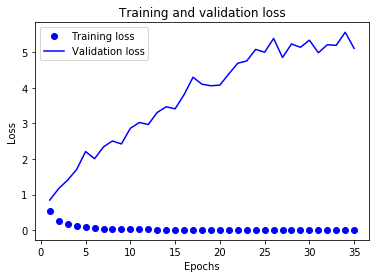

In [122]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

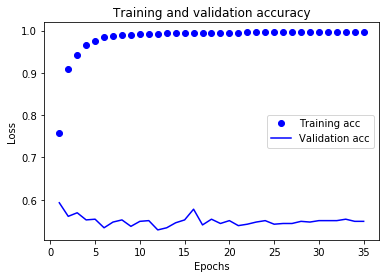

In [123]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Deep Learning using Embedding


In [124]:
import numpy as np
import pandas as pd

In [125]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [126]:
train= pd.read_csv("V1.4_Training.csv",encoding = "latin-1")
dev= pd.read_csv("SubtaskA_Trial_Test_Labeled.csv",encoding = "latin-1")
test = pd.read_csv("SubtaskA_EvaluationData.csv", encoding = 'latin-1')

In [127]:
train.head()

,id,sentence,label
0,663_3,"""Please enable removing language code from the...",1
1,663_4,"""Note: in your .csproj file, there is a Suppor...",0
2,664_1,"""Wich means the new version not fully replaced...",0
3,664_2,"""Some of my users will still receive the old x...",0
4,664_3,"""The store randomly gives the old xap or the n...",0


In [128]:
train.shape

(8500, 3)

In [129]:
dev.head()

,id,sentence,label
0,1310_1,I'm not asking Microsoft to Gives permission l...,1
1,1312_1,somewhere between Android and iPhone.,0
2,1313_1,And in the Windows Store you can flag the App ...,0
3,1313_2,"Many thanks Sameh Hi, As we know, there is a l...",0
4,1313_3,The idea is that we can develop a regular app ...,1


In [130]:
dev.shape

(592, 3)

In [131]:
suggestion_count = (train['label'].values == 1).astype(int).sum()
non_suggestion_count = (train['label'].values == 0).astype(int).sum()
suggestions = train[train['label'].values == 1]

while suggestion_count < non_suggestion_count:
    random_suggestion = suggestions.sample()
    train = train.append(random_suggestion, ignore_index = True)
    suggestion_count = suggestion_count + 1

In [132]:
maxlen = 100

In [133]:
training_samples = 200

In [134]:
validation_samples = 10000

In [135]:
max_words = 10000

In [136]:
tokenizer=Tokenizer(num_words = max_words)

In [137]:
tokenizer.fit_on_texts(train['sentence'])

In [138]:
sequences_train = tokenizer.texts_to_sequences(train['sentence'])

In [139]:
len(sequences_train)

12830

In [140]:
sequences_dev = tokenizer.texts_to_sequences(dev['sentence'])

In [141]:
len(sequences_dev)

592

In [142]:
word_index_train = tokenizer.word_index

In [143]:
print("Found %s unique tokens."%len(word_index_train))

Found 10001 unique tokens.


In [144]:
train_data = pad_sequences(sequences_train,maxlen = maxlen)

In [145]:
dev_data = pad_sequences(sequences_dev,maxlen = maxlen)

In [146]:
train_labels = np.asarray(train['label'])

In [147]:
dev_labels = np.asarray(dev['label'])

In [148]:
print('shape of train data tensor: ',train_data.shape)

shape of train data tensor:  (12830, 100)


In [149]:
print('shape of train labels tensor: ',train_labels.shape)

shape of train labels tensor:  (12830,)


In [150]:
print('shape of dev data tensor: ',dev_data.shape)

shape of dev data tensor:  (592, 100)


In [151]:
print('shape of dev labels tensor: ',dev_labels.shape)

shape of dev labels tensor:  (592,)


<h2>Downloading a pretrained embedder</h2>

In [152]:
glove_dir = 'glove.6B'

In [153]:
embeddings_index = {}

In [154]:
import os

In [155]:
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'))

In [156]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype = 'float32')
    embeddings_index[word] = coefs
    
f.close()

In [157]:
print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [158]:
embedding_dim = 100

In [159]:
embedding_matrix = np.zeros((max_words,embedding_dim))
for word, i in word_index_train.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            

In [160]:
embedding_matrix[2]

array([-1.89700007e-01,  5.00239991e-02,  1.90840006e-01, -4.91839983e-02,
       -8.97369981e-02,  2.10060000e-01, -5.49520016e-01,  9.83769968e-02,
       -2.01350003e-01,  3.42409998e-01, -9.26769972e-02,  1.60999998e-01,
       -1.32679999e-01, -2.81599998e-01,  1.87370002e-01, -4.29589987e-01,
        9.60389972e-01,  1.39719993e-01, -1.07809997e+00,  4.05180007e-01,
        5.05389988e-01, -5.50639987e-01,  4.84400004e-01,  3.80439997e-01,
       -2.90549989e-03, -3.49420011e-01, -9.96960029e-02, -7.83680022e-01,
        1.03629994e+00, -2.31399998e-01, -4.71210003e-01,  5.71259975e-01,
       -2.14540005e-01,  3.59580010e-01, -4.83190000e-01,  1.08749998e+00,
        2.85239995e-01,  1.24470003e-01, -3.92480008e-02, -7.67320022e-02,
       -7.63429999e-01, -3.24090004e-01, -5.74899971e-01, -1.08930004e+00,
       -4.18110013e-01,  4.51200008e-01,  1.21119998e-01, -5.13670027e-01,
       -1.33489996e-01, -1.13779998e+00, -2.87680000e-01,  1.67740002e-01,
        5.58040023e-01,  

# Training the same model without a pretrained word embedding

In [161]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

<h2> Building the model </h2>

In [162]:
model = Sequential()

In [163]:
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))

In [164]:
model.add(Flatten())
model.add(Dense(16,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
__________

<h2>Compilation</h2>

In [165]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

<h2>Fitting</h2>

In [166]:
history = model.fit(train_data,train_labels,
                    epochs = 30, 
                    batch_size = 200,
                    validation_data=(dev_data,dev_labels))
model.save_weights('pre_trained_glove_model.h5')

Train on 12830 samples, validate on 592 samples
Epoch 1/30
12830/12830 [==============================] - 2s 147us/step - loss: 0.5867 - acc: 0.6638 - val_loss: 0.5797 - val_acc: 0.7213
Epoch 2/30
12830/12830 [==============================] - 1s 92us/step - loss: 0.2384 - acc: 0.9118 - val_loss: 0.6196 - val_acc: 0.7348
Epoch 3/30
12830/12830 [==============================] - 1s 89us/step - loss: 0.1014 - acc: 0.9680 - val_loss: 1.0262 - val_acc: 0.7044
Epoch 4/30
12830/12830 [==============================] - 1s 97us/step - loss: 0.0470 - acc: 0.9875 - val_loss: 1.1412 - val_acc: 0.6672
Epoch 5/30
12830/12830 [==============================] - 1s 88us/step - loss: 0.0321 - acc: 0.9913 - val_loss: 1.7051 - val_acc: 0.6351
Epoch 6/30
12830/12830 [==============================] - 1s 88us/step - loss: 0.0235 - acc: 0.9924 - val_loss: 2.4566 - val_acc: 0.6334
Epoch 7/30
12830/12830 [==============================] - 1s 90us/step - loss: 0.0192 - acc: 0.9941 - val_loss: 1.9329 - val_acc:

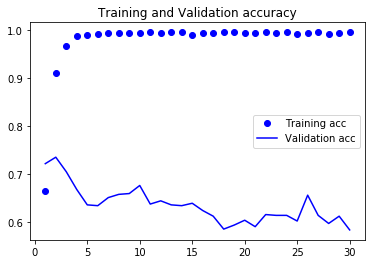

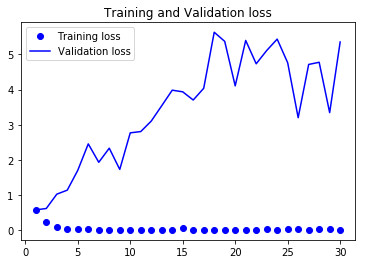

In [167]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Training the same model with a pretrained word embedding

In [168]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [169]:
model = Sequential()

<h2>Creating a Model</h2>

In [170]:
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))

In [171]:
model.add(Flatten())
model.add(Dense(16,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(32,activation = "relu"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
__________

<h2> Adding the embedding layer</h2>

In [172]:
model.layers[0]

In [173]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [174]:
model.layers[0]

In [175]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
__________

<h2>Compilation</h2>

In [176]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

<h2> Fitting </h2>

In [177]:
history = model.fit(train_data,train_labels,
                    epochs = 30, 
                    batch_size = 200,
                    validation_data=(dev_data,dev_labels))
model.save_weights('pre_trained_glove_model.h5')

Train on 12830 samples, validate on 592 samples
Epoch 1/30
12830/12830 [==============================] - 1s 76us/step - loss: 0.6239 - acc: 0.6481 - val_loss: 1.0258 - val_acc: 0.5608
Epoch 2/30
12830/12830 [==============================] - 0s 32us/step - loss: 0.4871 - acc: 0.7679 - val_loss: 0.8130 - val_acc: 0.6199
Epoch 3/30
12830/12830 [==============================] - 0s 29us/step - loss: 0.3972 - acc: 0.8200 - val_loss: 0.8502 - val_acc: 0.6453
Epoch 4/30
12830/12830 [==============================] - 0s 30us/step - loss: 0.3277 - acc: 0.8599 - val_loss: 0.8448 - val_acc: 0.6740
Epoch 5/30
12830/12830 [==============================] - 0s 36us/step - loss: 0.2739 - acc: 0.8804 - val_loss: 0.8443 - val_acc: 0.6436
Epoch 6/30
12830/12830 [==============================] - 0s 30us/step - loss: 0.2262 - acc: 0.9070 - val_loss: 1.3020 - val_acc: 0.6199
Epoch 7/30
12830/12830 [==============================] - 0s 31us/step - loss: 0.1751 - acc: 0.9314 - val_loss: 1.3104 - val_acc: 

<p>we have achieved a better accuracy after using a pretrained word embedding</p>

<h2>Visualisation of training and validation loss and training and validation accuracy.</h2>

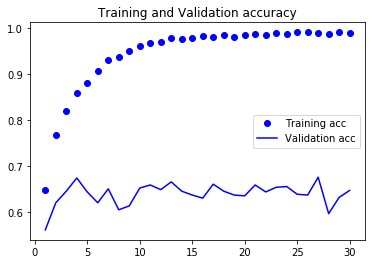

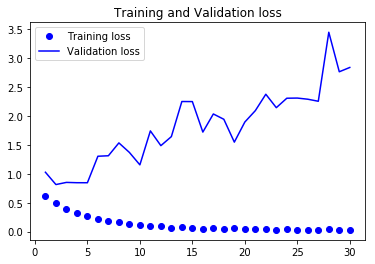

In [178]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [179]:
test.head()

,Id,sentence,label
0,9566,This would enable live traffic aware apps.,X
1,9569,Please try other formatting like bold italics ...,X
2,9576,Since computers were invented to save time I s...,X
3,9577,Allow rearranging if the user wants to change ...,X
4,9579,Add SIMD instructions for better use of ARM NE...,X


In [180]:
test.shape

(833, 3)

In [181]:
sequences_test = tokenizer.texts_to_sequences(test['sentence'])

In [182]:
test_data = pad_sequences(sequences_test,maxlen = maxlen)

In [183]:
sequences_test[0]

[16, 14, 275, 345, 3174, 2934, 29]

<h2>Prediction</h2>

In [184]:
ypred = model.predict(test_data)

In [185]:
len(ypred)

833

In [186]:
y = []
for i in ypred:
    if i < 0.5:
        y.append(0)
    else:
        y.append(1)

In [187]:
set(y)

{0, 1}

In [188]:
submission = pd.read_csv("SubtaskA_EvaluationData.csv")
submission.drop(['label'], axis = 1)
submission['label'] = y
submission.to_csv("Divyanshu_Aggarwal.csv", index = False)

In [189]:
submission.head()

,Id,sentence,label
0,9566,This would enable live traffic aware apps.,0
1,9569,Please try other formatting like bold italics ...,0
2,9576,Since computers were invented to save time I s...,0
3,9577,Allow rearranging if the user wants to change ...,0
4,9579,Add SIMD instructions for better use of ARM NE...,1
